In [1]:
import pandas as pd#################importing libraries
## plotting libraries
from matplotlib import pyplot as plt
## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [2]:
df=pd.read_csv('DATA_Customer-Churn.csv')###importing the files 

In [3]:
df####Read that data into Python and call the dataframe churnData.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
##Check the datatypes of all the columns in the data.
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
#####Convert this column into numeric type using pd.to_numeric function.

df["TotalCharges"]= pd.to_numeric(df["TotalCharges"],errors='coerce')


In [6]:
df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
df.isnull().any()###########checking any null values in the dataframe

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [9]:
df=df.fillna(df.mean())############Check for null values in the dataframe. Replace the null values.

In [10]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [11]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 1230  # specifies a sampling for repeatable results

In [12]:
import numpy as np
numeric_df=df.select_dtypes(np.number)
numeric_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [13]:
X = numeric_df########splitting the X and y 
y = df['Churn']

In [14]:
# target variable is malignant or benign (binary label).
# let's check the distribution of labels
y.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE) # splitting the data into train and test sets

In [16]:
from sklearn.preprocessing import StandardScaler #fit and transform the train 
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = KNeighborsClassifier(n_neighbors=1,weights='uniform') # declare we're using knn classification model
model.fit(X_train_scaled, y_train) # train model
y_pred = model.predict(X_test_scaled) # predict test
y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [18]:
y_pred###prediction of the test set

array(['Yes', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

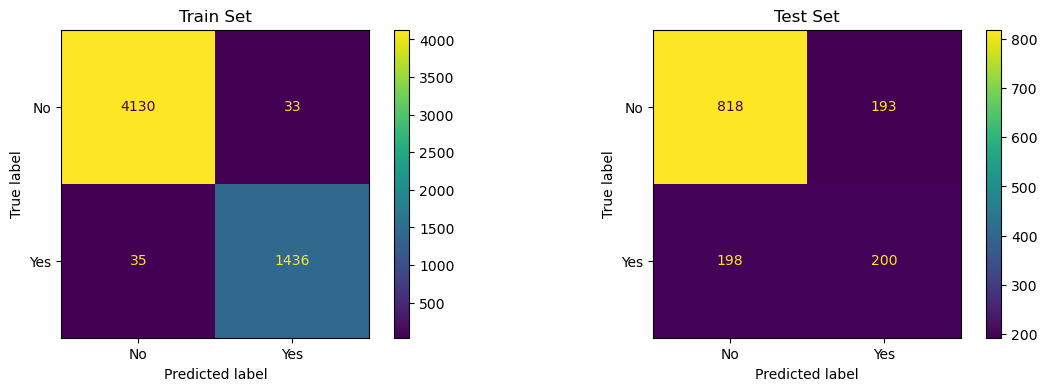

In [19]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test_scaled,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

############Performance Metrics

In [20]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test,pos_label='Yes')]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test


In [21]:
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.99,0.72
1,Precision,0.98,0.51
2,Recall,0.98,0.50


In [22]:
y_train_vs_predicted # train labels

,Real,Predicted
7000,No,No
309,No,No
2302,No,No
5894,Yes,Yes
4522,No,No
...,...,...
4137,No,No
4833,No,No
2907,Yes,Yes
6909,No,No


In [23]:
#########define function#########

In [24]:
def evaluator_kn_classifier (n):
    model = KNeighborsClassifier(n_neighbors=n,weights='uniform') # declare we're using knn classification model
    model.fit(X_train_scaled, y_train) # train model
    y_pred_test = model.predict(X_test_scaled) # predict test
    y_pred_train=model.predict(X_train_scaled) # predict train (for sanity checks)

    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                            'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,pos_label='Yes')],
                            'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test,pos_label='Yes')]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df

In [25]:
evaluator_kn_classifier(3)

,Error_metric,Train,Test
0,Accuracy,0.86,0.76
1,Precision,0.78,0.59
2,Recall,0.67,0.51


In [26]:
for i in range(1,15):
    print("Error metrics for Knn model with n = ", i)
    display(evaluator_kn_classifier(i))

Error metrics for Knn model with n =  1


,Error_metric,Train,Test
0,Accuracy,0.99,0.72
1,Precision,0.98,0.51
2,Recall,0.98,0.50


Error metrics for Knn model with n =  2


,Error_metric,Train,Test
0,Accuracy,0.86,0.75
1,Precision,0.99,0.63
2,Recall,0.47,0.32


Error metrics for Knn model with n =  3


,Error_metric,Train,Test
0,Accuracy,0.86,0.76
1,Precision,0.78,0.59
2,Recall,0.67,0.51


Error metrics for Knn model with n =  4


,Error_metric,Train,Test
0,Accuracy,0.84,0.77
1,Precision,0.82,0.66
2,Recall,0.48,0.38


Error metrics for Knn model with n =  5


,Error_metric,Train,Test
0,Accuracy,0.84,0.77
1,Precision,0.73,0.61
2,Recall,0.59,0.49


Error metrics for Knn model with n =  6


,Error_metric,Train,Test
0,Accuracy,0.83,0.78
1,Precision,0.78,0.66
2,Recall,0.47,0.42


Error metrics for Knn model with n =  7


,Error_metric,Train,Test
0,Accuracy,0.83,0.78
1,Precision,0.72,0.63
2,Recall,0.56,0.49


Error metrics for Knn model with n =  8


,Error_metric,Train,Test
0,Accuracy,0.82,0.78
1,Precision,0.75,0.66
2,Recall,0.48,0.43


Error metrics for Knn model with n =  9


,Error_metric,Train,Test
0,Accuracy,0.82,0.78
1,Precision,0.70,0.63
2,Recall,0.54,0.50


Error metrics for Knn model with n =  10


,Error_metric,Train,Test
0,Accuracy,0.81,0.78
1,Precision,0.72,0.65
2,Recall,0.46,0.43


Error metrics for Knn model with n =  11


,Error_metric,Train,Test
0,Accuracy,0.82,0.78
1,Precision,0.70,0.64
2,Recall,0.52,0.50


Error metrics for Knn model with n =  12


,Error_metric,Train,Test
0,Accuracy,0.81,0.78
1,Precision,0.73,0.68
2,Recall,0.46,0.45


Error metrics for Knn model with n =  13


,Error_metric,Train,Test
0,Accuracy,0.82,0.79
1,Precision,0.70,0.67
2,Recall,0.51,0.48


Error metrics for Knn model with n =  14


,Error_metric,Train,Test
0,Accuracy,0.81,0.79
1,Precision,0.72,0.69
2,Recall,0.46,0.44


optional(logistic regression)

,Error_metric,Train,Test
0,Accuracy,0.79,0.80
1,Precision,0.65,0.70
2,Recall,0.43,0.46


Confusion matrix for the train set
[[3800  343]
 [ 847  644]]


Confusion matrix for the test set
[[957  74]
 [206 172]]


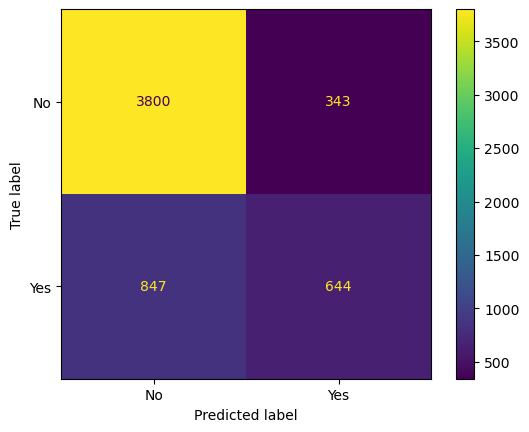

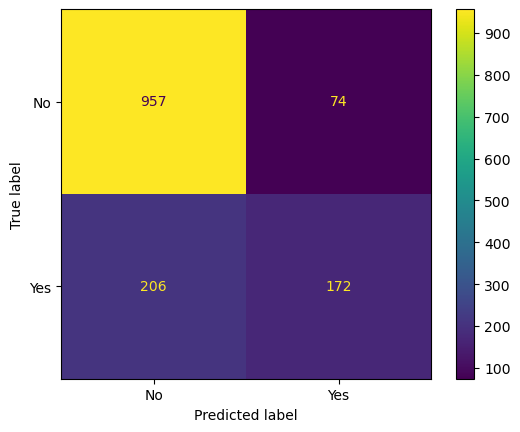

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log,pos_label='Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')


print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')


In [28]:
####################################################Day3################################################################

Decision Tree Classifier

In [ ]:
#######define the function for the decision tree##############

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

def evaluator_decision_classifier(n):
    model = DecisionTreeClassifier(max_depth=n)
    model.fit(X_train, y_train)

    y_pred_train_dt = model.predict(X_train)
    y_pred_test_dt = model.predict(X_test)


    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_dt,pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_dt,pos_label='Yes')]})

    
    return performance_df

In [30]:
evaluator_decision_classifier(4)

,Error_metric,Train,Test
0,Accuracy,0.79,0.77
1,Precision,0.68,0.64
2,Recall,0.39,0.35


In [31]:
y_train

5305     No
3351    Yes
5177    Yes
1460    Yes
4010     No
       ... 
1293     No
4023     No
5200     No
3775    Yes
1945     No
Name: Churn, Length: 5634, dtype: object

In [32]:
for i in range(1,5):
    print("Error metrics for Decision tree classifier model with n = ", i)
    display(evaluator_decision_classifier(i))

Error metrics for Decision tree classifier model with n =  1


C:\Users\natra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\natra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.74,0.73
1,Precision,0.00,0.00
2,Recall,0.00,0.00


Error metrics for Decision tree classifier model with n =  2


,Error_metric,Train,Test
0,Accuracy,0.78,0.78
1,Precision,0.65,0.67
2,Recall,0.41,0.38


Error metrics for Decision tree classifier model with n =  3


,Error_metric,Train,Test
0,Accuracy,0.78,0.78
1,Precision,0.65,0.67
2,Recall,0.41,0.38


Error metrics for Decision tree classifier model with n =  4


,Error_metric,Train,Test
0,Accuracy,0.79,0.77
1,Precision,0.68,0.64
2,Recall,0.39,0.35


In [ ]:
#############################checking the accuracy on the test data#################

Decision Tree=0.78
Logistics Regression=0.80
Knn-classifier=0.77

As per my prediction Logistics Regression is gives the best.

In [ ]:
################################################################Day4#########################################

################resampling#########################

In [33]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,Yes


In [34]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [35]:
NEG_CLASS_CNT = 5174 # number of negative labels

In [36]:
print("The majority class (negative cases) represents {:.2f}% of the data".format(NEG_CLASS_CNT/len(df['Churn'])*100))

The majority class (negative cases) represents 73.46% of the data


In [37]:
df.shape

(7043, 16)

#####Method 1: Upsampling using SMOTE

In [38]:
y = df['Churn']
X = numeric_df

In [39]:
numeric_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [40]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [41]:
y_train.value_counts()

No     4143
Yes    1491
Name: Churn, dtype: int64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)####spiliting train and test

In [43]:
X_sm, y_sm = smote.fit_resample(X_train, y_train)###minority class counts will be the same for the majority class
y_sm.value_counts()

No     4116
Yes    4116
Name: Churn, dtype: int64

In [ ]:
###################################Cross Validation##################################################################

In [44]:
df=pd.read_csv('DATA_Customer-Churn.csv')###importing the files 

In [45]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [46]:
#####Convert this column into numeric type using pd.to_numeric function.

df["TotalCharges"]= pd.to_numeric(df["TotalCharges"],errors='coerce')
df["TotalCharges"]

0        29.85
1      1889.50
2       108.15
3      1840.75
4       151.65
         ...  
7038   1990.50
7039   7362.90
7040    346.45
7041    306.60
7042   6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [47]:
df=df.fillna(df.mean())############Check for null values in the dataframe. Replace the null values.

In [48]:
numeric_df1=df.select_dtypes(np.number)
numeric_df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [49]:
y = df['Churn']
X = numeric_df1

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [51]:
from sklearn.tree import DecisionTreeClassifier

print("X has %d rows and %d columns"  %(X.shape[0],X.shape[1]))
print("y has %d rows"  %(y.shape[0]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The (mean) accuracy on the test set is %.2f" %(model.score(X_test, y_test)))
print("The (mean) accuracy on the train data is %.2f" %(model.score(X_train, y_train)))

X has 7043 rows and 4 columns
y has 7043 rows
The (mean) accuracy on the test set is 0.71
The (mean) accuracy on the train data is 0.99


In [52]:
set(y) # 3 labels

{'No', 'Yes'}

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

scores=cross_val_score(model, X_sm, y_sm, cv=5) # 5 cv foldings
scores

array([0.71827565, 0.71948998, 0.76245443, 0.74422843, 0.77946537])

In [54]:
print("Five-fold cv results: \n %0.2f mean accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Five-fold cv results: 
 0.74 mean accuracy with a standard deviation of 0.02


In [55]:
y_test

3466     No
2413     No
5929     No
6236     No
304      No
       ... 
5815    Yes
2839     No
4186     No
6367     No
5450    Yes
Name: Churn, Length: 1409, dtype: object

In [56]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)###taking the mode of the given numerical variable
y_pred

array(['No', 'Yes', 'No', ..., 'No', 'Yes', 'Yes'], dtype=object)

####################### *Models Comparision (3 classifiation estimators)*#######################

In [57]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_sm, y_sm, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7474548149328542, 'Logistic Regression': 0.7302011610638586, 'KNN': 0.7632440439961903}


In [58]:
print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,Classification Tree,Logistic Regression,KNN
score,0.75,0.73,0.76


In [ ]:
###################################################Day5#########################################################

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc_ops = {"max_depth":6,
           "min_samples_leaf":20,
           "max_features":None,
           "n_estimators":100,
           "bootstrap":True,
           "oob_score":True,
           "random_state":RAND_STATE}

clf = RandomForestClassifier(**rfc_ops)###** represents the keyword arguments

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train, y_train)
print("train prediction accuracy score: %.2f" %(clf.score(X_train, y_train)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))

train prediction accuracy score: 0.81
test prediction accuracy score: 0.79


In [64]:
#####Grid research

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    ##'max_samples' : ['None', 0.5],
    ##'max_depth':[3,5,10],
    ## 'bootstrap':[True,False]
    }
clf = RandomForestClassifier(random_state=RAND_STATE)

In [66]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [67]:
grid_search.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1230),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [68]:
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [69]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.33,0.01,0.02,0.00,sqrt,1,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,...,0.76,0.01,11,0.99,0.99,0.99,0.99,0.99,0.99,0.00
1,0.64,0.02,0.03,0.01,sqrt,1,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,...,0.76,0.01,12,0.99,0.99,0.99,0.99,0.99,0.99,0.00
2,3.29,0.06,0.16,0.01,sqrt,1,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,...,0.77,0.01,10,0.99,0.99,0.99,0.99,0.99,0.99,0.00
3,0.33,0.02,0.02,0.01,sqrt,1,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,...,0.77,0.01,8,0.97,0.97,0.97,0.97,0.97,0.97,0.00
4,0.64,0.03,0.04,0.01,sqrt,1,4,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,...,0.77,0.01,9,0.97,0.97,0.97,0.98,0.97,0.97,0.00
5,3.28,0.09,0.17,0.02,sqrt,1,4,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.77,...,0.77,0.01,7,0.98,0.98,0.98,0.98,0.98,0.98,0.00
6,0.33,0.02,0.02,0.01,sqrt,2,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.77,...,0.77,0.01,5,0.93,0.93,0.93,0.93,0.93,0.93,0.00
7,0.64,0.02,0.03,0.00,sqrt,2,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.77,...,0.77,0.01,3,0.93,0.93,0.93,0.94,0.93,0.93,0.00
8,3.32,0.24,0.15,0.01,sqrt,2,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.77,...,0.77,0.01,1,0.94,0.93,0.94,0.94,0.93,0.94,0.00
9,0.36,0.05,0.02,0.01,sqrt,2,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.77,...,0.77,0.01,5,0.93,0.93,0.93,0.93,0.93,0.93,0.00


In [ ]:
#####Please check RandomSearch as another algorithm comparable to GridSearch

In [70]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=RAND_STATE, **best_params)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(np.mean(cross_val_scores))

0.7733385762985401


In [ ]:
######################Feature Importance

In [71]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       n_estimators=500, random_state=1230)

In [72]:
len(X_train.columns)

4

In [73]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [74]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
2,MonthlyCharges,0.38
3,TotalCharges,0.34
1,tenure,0.25
0,SeniorCitizen,0.03
